In [5]:
# example adapted from
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA

from utils import *

%load_ext autoreload
%autoreload 2

## Task 3: Bifurcations in higher dimensions

### Part 1: Andronov-Hopf bifurcation

In [6]:
def compute_f(x, alpha):
    """
    compute the right handsides of two equations
    """
    if x.size > 2:
        x1 = x[:,0]
        x2 = x[:,1]
    else:
        x1 = x[0]
        x2 = x[1]

    f1 = alpha * x1 - x2 - x1 * (x1**2 + x2**2)
    f2 = x1 + alpha * x2 - x2 * (x1**2 + x2**2)

    return np.array([f1, f2])

In [7]:
def plot_nonlinear(x, alpha, yt, grid_shape):
    """
    plot the phase portraits based on non-linear equations
    """    
    # example nonlinear vector field
    f = compute_f(x, alpha)
    f1 = f[0].reshape(grid_shape[1:])
    f2 = f[1].reshape(grid_shape[1:])
    x1 = x[:,0].reshape(grid_shape[1:]).T
    x2 = x[:,1].reshape(grid_shape[1:]).T

    ax1 = plot_phase_portrait_nonlinear(f1, f2, x1, x2, alpha)
    # then plot the trajectory over it
    ax1.plot(yt[:, 0], yt[:, 1], c='red', label='Example trajectory')
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    # prettify
    ax1.legend()
    ax1.set_aspect(1)
    plt.show()

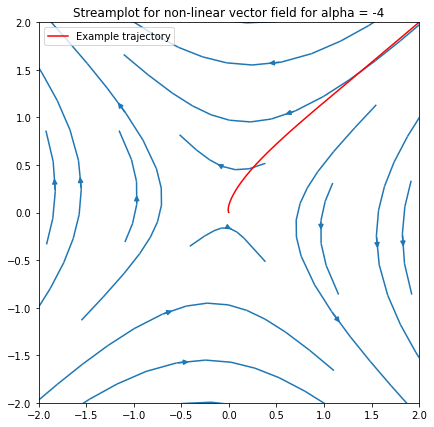

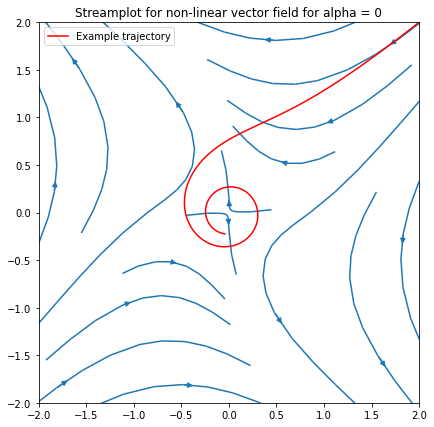

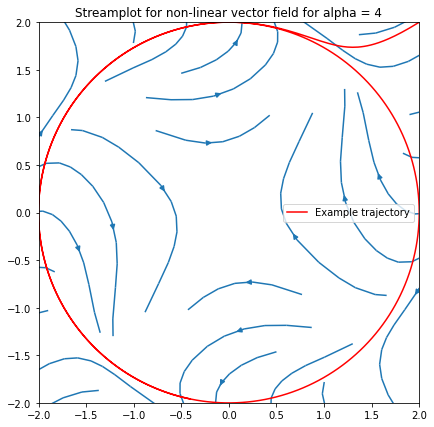

In [8]:
# define notebook parameters
w = 5

x = np.mgrid[-w:w:100j, -w:w:100j]
grid_shape = x.shape
x = x.reshape((2,x[0].size)).T

# parameter alpha
alphas = [-4, 0, 4]
for alpha in alphas:
    # example for Euler's method to construct and plot a trajectory over the stream plot
    y0 = np.array([2, 2])
    time = np.linspace(0, 10, 1000)
    yt, time = solve_euler(lambda y: compute_f(y, alpha), y0, time)

    plot_nonlinear(x, alpha, yt, grid_shape)

[2. 0.]


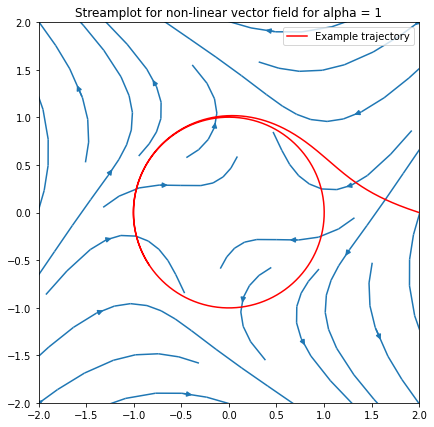

[0.5 0. ]


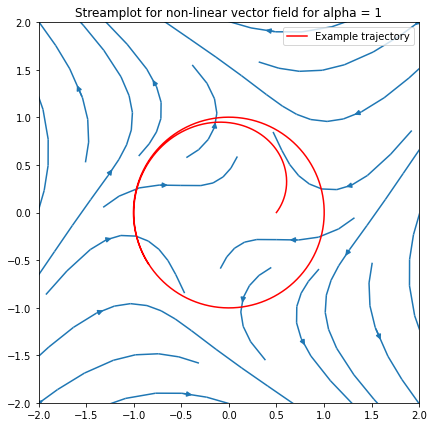

In [9]:
# define notebook parameters
w = 5

x = np.mgrid[-w:w:100j, -w:w:100j]
grid_shape = x.shape
x = x.reshape((2,x[0].size)).T
alpha = 1

# example for Euler's method to construct and plot a trajectory over the stream plot
y0_list = np.array([[2, 0],
                   [0.5, 0]])
time = np.linspace(0, 10, 1000)

for y0 in y0_list:
    print(y0)
    yt, time = solve_euler(lambda y: compute_f(y, alpha), y0, time)
    plot_nonlinear(x, alpha, yt, grid_shape)

### Part2: Cusp bifurication

In [10]:
def compute_alpha1(x, alpha2):
    """
    compute the value of alpha1 as a function of (alpha2, x)
    """
    return - alpha2 * x + x**3

In [11]:
def plot_3d_2d(alpha1, alpha2, x):
    """
    plot 3d surface and its equivalent 2d contour
    """
    fig = plt.figure(figsize=(15, 7))
    ax1  = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(alpha2, alpha1, x, cmap = 'rainbow')
    ax2  = fig.add_subplot(122)
    cp = ax2.contour(alpha2, alpha1, x, cmap='rainbow')
    ax2.set_ylim([-0.5, 0.5])

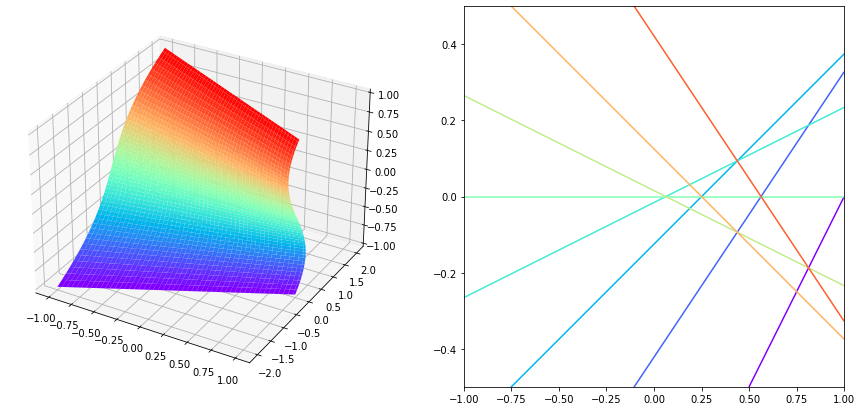

In [12]:
w = 1

alpha2, x = np.mgrid[-w:w:100j, -w:w:100j]
alpha1 = compute_alpha1(x, alpha2)

plot_3d_2d(alpha1, alpha2, x)

In [13]:
def compute_pca(points):
    """
    compute the transform data set applying a principal component analysis
    """

    pca = PCA(n_components=3)
    pca.fit(points)
    points_pca = pca.transform(points)
    points_new = pca.inverse_transform(points_pca)

    print("original shape:   ", points.shape)
    print("transformed shape:", points_pca.shape)  

    return points_new      

In [14]:
def plot_pca(x, points, points_new):
    fig = plt.figure(figsize=(15, 7))
    ax1  = fig.add_subplot(121, projection='3d')
    ax1.scatter(*points.T, c=x, cmap="rainbow")

    ax2  = fig.add_subplot(122)
    plt.scatter(points_new[:,0], points_new[:,1], c=x, cmap='rainbow')
    ax2.set_ylim([-0.5, 0.5])
    ax2.set_xlim([-0.5, 0.5])

    plt.show()

original shape:    (10000, 3)
transformed shape: (10000, 3)


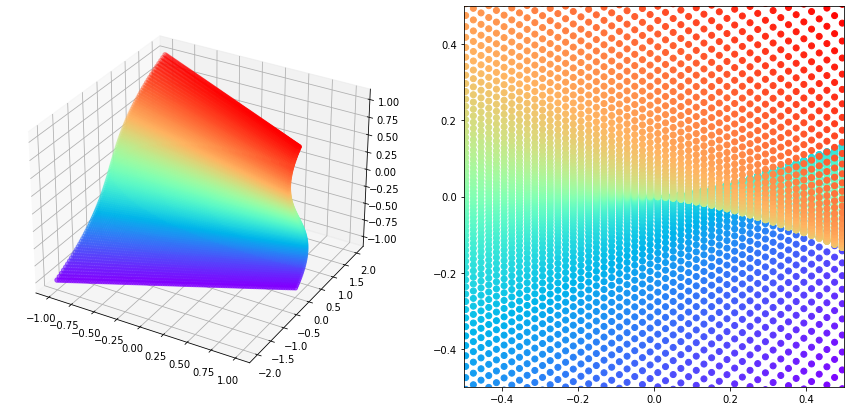

In [15]:
# convert the array to parameters to points in 3d space
points = np.array([alpha2, alpha1, x])
points = points.reshape((3, 100*100)).T

points_new = compute_pca(points)
plot_pca(x, points, points_new)